In [ ]:
# ML Project
# Group 15 
# Akshat Saini - 2020019
# Nakul Thureja - 2020528
# Nishaant Rastogi - 2020091

In [ ]:
! pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, roc_auc_score, roc_curve, roc_curve, auc, accuracy_score, f1_score, recall_score, precision_score, classification_report
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
from pathlib import Path
import pickle
import os
import requests
import zipfile
import gzip
import ast
import warnings; 
warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if os.path.isfile('/content/drive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip') == True:
  zip_folder = Path("/content/drive/MyDrive")
  os.chdir("/content")
  data_folder = Path('/content/drive/MyDrive/ML_Project_Data')

  if not (data_folder / 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2').exists():  
    with zipfile.ZipFile(zip_folder / 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip', 'r') as zip_ref:
        print('--- Unzipping...')
        zip_ref.extractall(data_folder)
        print('--- Successfully unzipped the data')
  data_folder = data_folder / 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2'
else:
  data_folder = Path('/content/drive/MyDrive/ML_Project_Data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2')

In [ ]:
Y = pd.read_csv(data_folder / 'ptbxl_database.csv', index_col='ecg_id')
Y

patient_id    age  sex  height  weight  nurse  site      device  \
ecg_id                                                                    
1          15709.0   56.0    1     NaN    63.0    2.0   0.0   CS-12   E   
2          13243.0   19.0    0     NaN    70.0    2.0   0.0   CS-12   E   
3          20372.0   37.0    1     NaN    69.0    2.0   0.0   CS-12   E   
4          17014.0   24.0    0     NaN    82.0    2.0   0.0   CS-12   E   
5          17448.0   19.0    1     NaN    70.0    2.0   0.0   CS-12   E   
...            ...    ...  ...     ...     ...    ...   ...         ...   
21833      17180.0   67.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21834      20703.0  300.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21835      19311.0   59.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21836       8873.0   64.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21837      11744.0   68.0    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_date  \
ecg_id                        
1       1984-11-09 09:17:34   
2       1984-11-14 12:55:37   
3       1984-11-15 12:49:10   
4       1984-11-15 13:44:57   
5       1984-11-17 10:43:15   
...                     ...   
21833   2001-05-31 09:14:35   
21834   2001-06-05 11:33:39   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ... SLI-LVH  \
ecg_id                                                     ...           
1                  sinusrhythmus periphere niederspannung  ...   False   
2                     sinusbradykardie sonst normales ekg  ...    True   
3                              sinusrhythmus normales ekg  ...   False   
4                              sinusrhythmus normales ekg  ...   False   
5                              sinusrhythmus normales ekg  ...   False   
...                                                   ...  ...     ...   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...   False   
21834   sinusrhythmus lagetyp normal qrs(t) abnorm    ...  ...   False   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...   False   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...   False   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...   False   

       QRS-CLBB ST-ELEV-MI ST-DEPR-MI  Q-ISC  Q-ISC-QPeak  Q-ISC-V2V3  \
ecg_id                                                                  
1         False      False      False  False        False       False   
2         False      False      False  False        False       False   
3         False      False      False  False        False       False   
4         False      False      False  False        False       False   
5         False      False      False  False        False       False   
...         ...        ...        ...    ...          ...         ...   
21833     False      False       True  False        False       False   
21834     False      False      False  False        False       False   
21835     False      False      False  False        False       False   
21836     False      False      False  False        False       False   
21837     False      False      False  False        False       False   

        Q-ISC-RPeak STRAIN MI-ALL  
ecg_id                             
1             False  False  False  
2             False  False  False  
3             False  False  False  
4             False  False  False  
5             False  False  False  
...             ...    ...    ...  
21833         False  False   True  
21834         False  False  False  
21835         False  False  False  
21836         False  False  False  
21837         False  False  False  

[21801 rows x 43 columns]

In [ ]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL'],
      dtype='object')

In [ ]:
print(f"Dataframe size: {Y.shape}\n")
display(Y.isna().sum())
# print("\nPercent-wise:\n")
# display((Y.isna().sum() / Y.shape[0]).round(3))

Dataframe size: (21801, 43)



patient_id                          0
age                                 0
sex                                 0
height                          14826
weight                          12379
nurse                            1475
site                               18
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8470
infarction_stadium1             16188
infarction_stadium2             21698
validated_by                     9380
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20202
static_noise                    18541
burst_noise                     21188
electrodes_problems             21771
extra_beats                     19852
pacemaker                       21510
strat_fold                          0
filename_lr                         0
filename_hr 

In [ ]:
Y['patient_id'] = Y['patient_id'].astype('int32')
Y['age'] = Y['age'].astype('int32')

<Axes: xlabel='sex', ylabel='Count'>

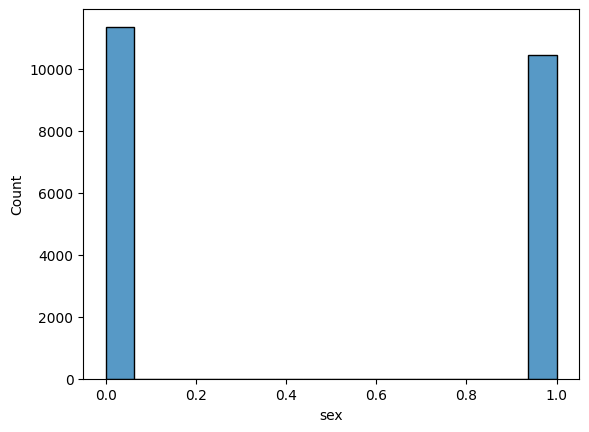

In [ ]:
sns.histplot(x = 'sex', data = Y)

<Axes: xlabel='age', ylabel='Count'>

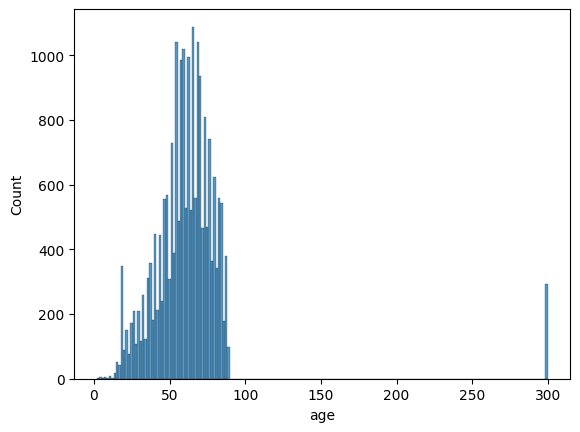

In [ ]:
sns.histplot(x = 'age', data = Y)

In [ ]:
Y = Y[Y['age'] < 100] 

<Axes: xlabel='age', ylabel='Count'>

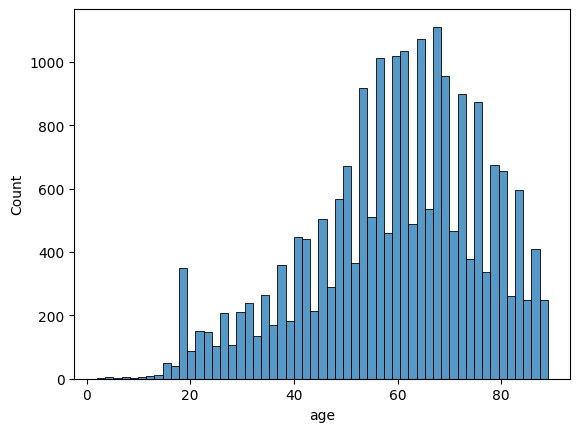

In [ ]:
sns.histplot(x = 'age', data = Y)

In [ ]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.histplot(x = 'device', data = Y)

<Axes: xlabel='device', ylabel='Count'>

# Combining ptbxl_database.csv and the scp_statements.csv

In [ ]:
if not type(Y.scp_codes.iloc[0]) == dict:
  Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [ ]:
Y.scp_codes.iloc[:10]

ecg_id
1     {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                 {'NORM': 80.0, 'SBRAD': 0.0}
3                   {'NORM': 100.0, 'SR': 0.0}
4                   {'NORM': 100.0, 'SR': 0.0}
5                   {'NORM': 100.0, 'SR': 0.0}
6                   {'NORM': 100.0, 'SR': 0.0}
7                   {'NORM': 100.0, 'SR': 0.0}
8       {'IMI': 35.0, 'ABQRS': 0.0, 'SR': 0.0}
9                   {'NORM': 100.0, 'SR': 0.0}
10                  {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, dtype: object

In [ ]:
df_scp = pd.read_csv(data_folder / 'scp_statements.csv', index_col=0)
df_scp

description  diagnostic  form  \
NDT                       non-diagnostic T abnormalities         1.0   1.0   
NST_                             non-specific ST changes         1.0   1.0   
DIG                                     digitalis-effect         1.0   1.0   
LNGQT                                   long QT-interval         1.0   1.0   
NORM                                          normal ECG         1.0   NaN   
...                                                  ...         ...   ...   
BIGU   bigeminal pattern (unknown origin, SV or Ventr...         NaN   NaN   
AFLT                                      atrial flutter         NaN   NaN   
SVTAC                       supraventricular tachycardia         NaN   NaN   
PSVT             paroxysmal supraventricular tachycardia         NaN   NaN   
TRIGU  trigeminal pattern (unknown origin, SV or Vent...         NaN   NaN   

       rhythm diagnostic_class diagnostic_subclass  \
NDT       NaN             STTC                STTC   
NST_      NaN             STTC                NST_   
DIG       NaN             STTC                STTC   
LNGQT     NaN             STTC                STTC   
NORM      NaN             NORM                NORM   
...       ...              ...                 ...   
BIGU      1.0              NaN                 NaN   
AFLT      1.0              NaN                 NaN   
SVTAC     1.0              NaN                 NaN   
PSVT      1.0              NaN                 NaN   
TRIGU     1.0              NaN                 NaN   

                                      Statement Category  \
NDT                    other ST-T descriptive statements   
NST_   Basic roots for coding ST-T changes and abnorm...   
DIG                    other ST-T descriptive statements   
LNGQT                  other ST-T descriptive statements   
NORM                                     Normal/abnormal   
...                                                  ...   
BIGU   Statements related to ectopic rhythm abnormali...   
AFLT   Statements related to impulse formation (abnor...   
SVTAC  Statements related to impulse formation (abnor...   
PSVT   Statements related to impulse formation (abnor...   
TRIGU  Statements related to ectopic rhythm abnormali...   

                           SCP-ECG Statement Description  AHA code  \
NDT                       non-diagnostic T abnormalities       NaN   
NST_                             non-specific ST changes     145.0   
DIG                            suggests digitalis-effect     205.0   
LNGQT                                   long QT-interval     148.0   
NORM                                          normal ECG       1.0   
...                                                  ...       ...   
BIGU   bigeminal pattern (unknown origin, SV or Ventr...       NaN   
AFLT                                      atrial flutter      51.0   
SVTAC                       supraventricular tachycardia      55.0   
PSVT             paroxysmal supraventricular tachycardia       NaN   
TRIGU  trigeminal pattern (unknown origin, SV or Vent...       NaN   

                       aECG REFID CDISC Code DICOM Code  
NDT                           NaN        NaN        NaN  
NST_         MDC_ECG_RHY_STHILOST        NaN        NaN  
DIG                           NaN        NaN        NaN  
LNGQT                         NaN        NaN        NaN  
NORM                          NaN        NaN    F-000B7  
...                           ...        ...        ...  
BIGU                          NaN        NaN        NaN  
AFLT         MDC_ECG_RHY_ATR_FLUT        NaN        NaN  
SVTAC        MDC_ECG_RHY_SV_TACHY        NaN   D3-31290  
PSVT   MDC_ECG_RHY_SV_TACHY_PAROX        NaN        NaN  
TRIGU                         NaN        NaN        NaN  

[71 rows x 12 columns]

In [ ]:
df_scp['diagnostic'].value_counts(dropna = False)

1.0    44
NaN    27
Name: diagnostic, dtype: int64

In [ ]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in df_scp.index:
            tmp.append(df_scp.loc[key].diagnostic_class)
    return list(set(tmp))

Y['diagnostic_superclass_all'] = Y.scp_codes.apply(aggregate_diagnostic)

df_scp_filtered = df_scp[~df_scp['diagnostic'].isna()]
def aggregate_diagnostic_filtered(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in df_scp_filtered.index:
            tmp.append(df_scp_filtered.loc[key].diagnostic_class)
    return list(set(tmp))

Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic_filtered)

# Use the scp_code information to update our metadata:
def aggregate_diagnostic(y_dic):
    tmp = 0
    for key in y_dic.keys():
        if key not in df_scp.index:
            tmp+=1
    return tmp

# Apply diagnostic superclass
Y['scp_not_listed'] = Y.scp_codes.apply(aggregate_diagnostic)

In [ ]:
Y

patient_id  age  sex  height  weight  nurse  site      device  \
ecg_id                                                                  
1            15709   56    1     NaN    63.0    2.0   0.0   CS-12   E   
2            13243   19    0     NaN    70.0    2.0   0.0   CS-12   E   
3            20372   37    1     NaN    69.0    2.0   0.0   CS-12   E   
4            17014   24    0     NaN    82.0    2.0   0.0   CS-12   E   
5            17448   19    1     NaN    70.0    2.0   0.0   CS-12   E   
...            ...  ...  ...     ...     ...    ...   ...         ...   
21832         7954   63    0     NaN     NaN    1.0   2.0  AT-60    3   
21833        17180   67    1     NaN     NaN    1.0   2.0  AT-60    3   
21835        19311   59    1     NaN     NaN    1.0   2.0  AT-60    3   
21836         8873   64    1     NaN     NaN    1.0   2.0  AT-60    3   
21837        11744   68    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_date  \
ecg_id                        
1       1984-11-09 09:17:34   
2       1984-11-14 12:55:37   
3       1984-11-15 12:49:10   
4       1984-11-15 13:44:57   
5       1984-11-17 10:43:15   
...                     ...   
21832   2001-05-30 14:14:25   
21833   2001-05-31 09:14:35   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ... ST-DEPR-MI  \
ecg_id                                                     ...              
1                  sinusrhythmus periphere niederspannung  ...      False   
2                     sinusbradykardie sonst normales ekg  ...      False   
3                              sinusrhythmus normales ekg  ...      False   
4                              sinusrhythmus normales ekg  ...      False   
5                              sinusrhythmus normales ekg  ...      False   
...                                                   ...  ...        ...   
21832   sinusrhythmus linkstyp periphere niederspannun...  ...       True   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...       True   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...      False   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...      False   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...      False   

        Q-ISC Q-ISC-QPeak Q-ISC-V2V3  Q-ISC-RPeak  STRAIN  MI-ALL  \
ecg_id                                                              
1       False       False      False        False   False   False   
2       False       False      False        False   False   False   
3       False       False      False        False   False   False   
4       False       False      False        False   False   False   
5       False       False      False        False   False   False   
...       ...         ...        ...          ...     ...     ...   
21832   False       False      False        False   False    True   
21833   False       False      False        False   False    True   
21835   False       False      False        False   False   False   
21836   False       False      False        False   False   False   
21837   False       False      False        False   False   False   

        diagnostic_superclass_all diagnostic_superclass scp_not_listed  
ecg_id                                                                  
1                     [nan, NORM]                [NORM]              0  
2                     [nan, NORM]                [NORM]              0  
3                     [nan, NORM]                [NORM]              0  
4                     [nan, NORM]                [NORM]              0  
5                     [nan, NORM]                [NORM]              0  
...                           ...                   ...            ...  
21832                   [CD, nan]                  [CD]              0  
21833                 [nan, STTC]                [STTC]              0  
21835                 [n

In [ ]:
Y[['scp_codes', 'diagnostic_superclass_all', 'diagnostic_superclass', 'scp_not_listed']]

scp_codes  \
ecg_id                                                      
1                {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}   
2                            {'NORM': 80.0, 'SBRAD': 0.0}   
3                              {'NORM': 100.0, 'SR': 0.0}   
4                              {'NORM': 100.0, 'SR': 0.0}   
5                              {'NORM': 100.0, 'SR': 0.0}   
...                                                   ...   
21832           {'LAFB': 100.0, 'IVCD': 100.0, 'SR': 0.0}   
21833   {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...   
21835                          {'ISCAS': 50.0, 'SR': 0.0}   
21836                          {'NORM': 100.0, 'SR': 0.0}   
21837                          {'NORM': 100.0, 'SR': 0.0}   

       diagnostic_superclass_all diagnostic_superclass  scp_not_listed  
ecg_id                                                                  
1                    [nan, NORM]                [NORM]               0  
2                    [nan, NORM]                [NORM]               0  
3                    [nan, NORM]                [NORM]               0  
4                    [nan, NORM]                [NORM]               0  
5                    [nan, NORM]                [NORM]               0  
...                          ...                   ...             ...  
21832                  [CD, nan]                  [CD]               0  
21833                [nan, STTC]                [STTC]               0  
21835                [nan, STTC]                [STTC]               0  
21836                [nan, NORM]                [NORM]               0  
21837                [nan, NORM]                [NORM]               0  

[21508 rows x 4 columns]

In [ ]:
Y['strat_fold'].value_counts(dropna=False)

10    2164
3     2159
2     2151
1     2151
5     2150
4     2149
7     2149
6     2148
8     2146
9     2141
Name: strat_fold, dtype: int64

In [ ]:
Y['strat_fold'].value_counts(dropna=False)

Y_train = Y.query("strat_fold < 9")
Y_val   = Y.query("strat_fold == 9")
Y_test  = Y.query("strat_fold == 10")

def fold_type(strat_fold):
  if strat_fold < 9:
    return 'train'
  elif strat_fold == 9:
    return 'val'
  else:
    return 'test'

Y['fold_type'] = Y['strat_fold'].apply(fold_type)

In [ ]:
# Y['strat_fold'].value_counts(dropna=False)

# Y_train = Y[(~Y.strat_fold.isin([9,10]))]
# Y_val   = Y[Y.strat_fold == 9]
# Y_test  = Y[Y.strat_fold == 10]

# def fold_type(strat_fold):
#   if strat_fold < 8.5:
#     return 'train'
#   elif strat_fold == 9:
#     return 'val'
#   else:
#     return 'test'

# Y['fold_type'] = Y['strat_fold'].apply(fold_type)

In [ ]:
Y.filename_lr

ecg_id
1        records100/00000/00001_lr
2        records100/00000/00002_lr
3        records100/00000/00003_lr
4        records100/00000/00004_lr
5        records100/00000/00005_lr
                   ...            
21832    records100/21000/21832_lr
21833    records100/21000/21833_lr
21835    records100/21000/21835_lr
21836    records100/21000/21836_lr
21837    records100/21000/21837_lr
Name: filename_lr, Length: 21508, dtype: object

In [ ]:
# Adapted the physionet code to also return one meta object dictionnary, as inspection:
%cd '/content/drive/MyDrive/ML_Project_Data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/'
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path / f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path / f) for f in df.filename_hr]
    meta0 = data[0][1]
    data = np.array([signal for signal, meta in data])
    return data, meta0

sampling_rate = 100

# Load raw signal data
if os.path.isfile('X_train.pkl') == False:
  X_train, meta0 = load_raw_data(Y_train, sampling_rate, data_folder)
  pickle.dump(X_train, open('X_train.pkl', 'wb'))
  pickle.dump(meta0, open('meta0.pkl', 'wb'))
else:
  X_train = pickle.load(open('X_train.pkl', 'rb'))
  meta0 = pickle.load(open('meta0.pkl', 'rb'))

/content/drive/.shortcut-targets-by-id/1fLYsl_rQFcqucOWeETzrGjeBtIfECAnE/ML_Project_Data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2


In [ ]:
print(type(X_train))
X_train.shape

<class 'numpy.ndarray'>


(17203, 1000, 12)

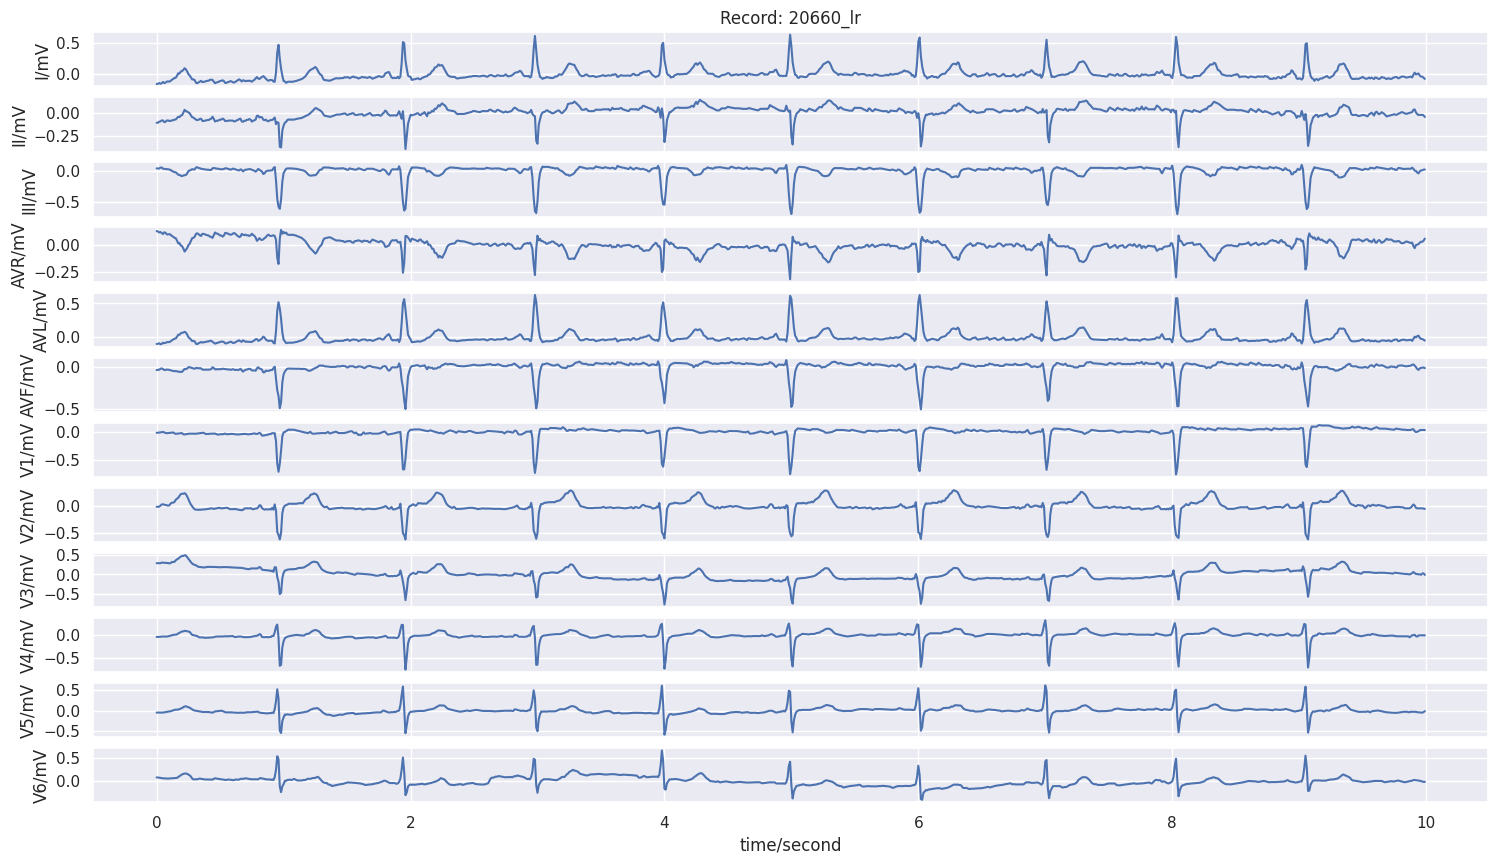

None

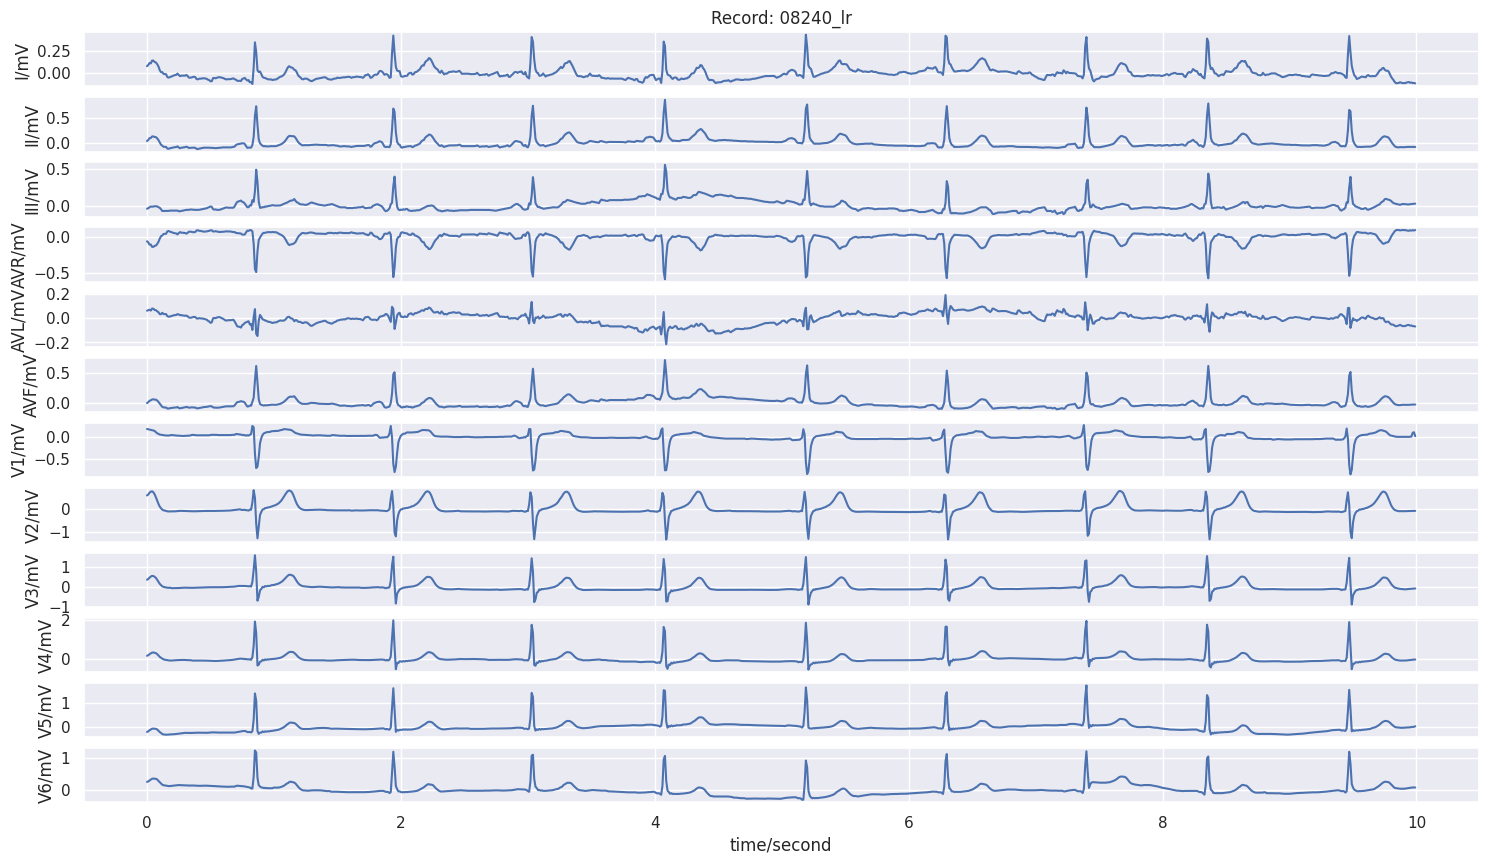

None

None

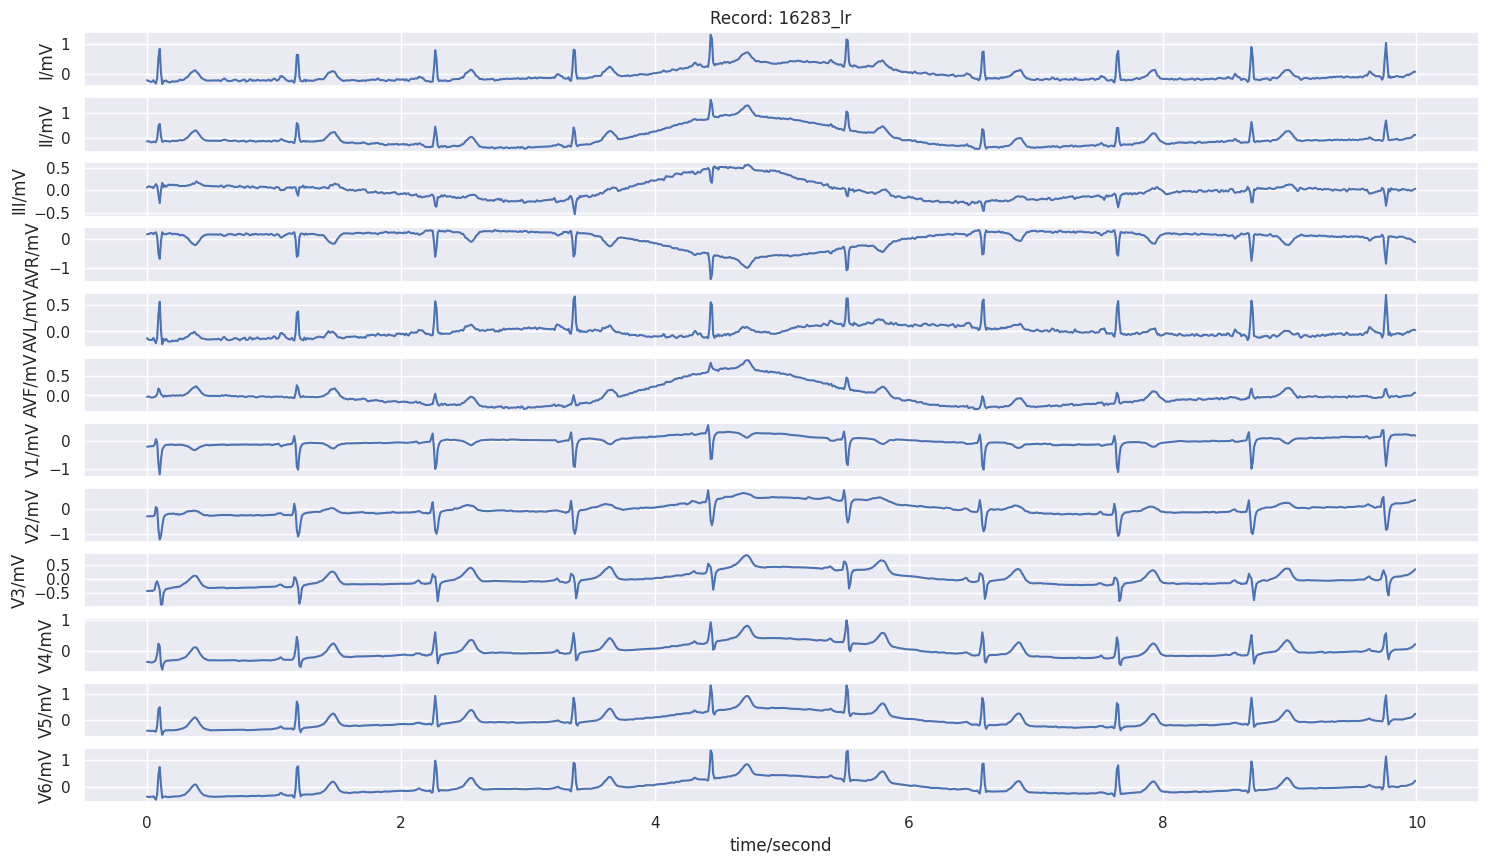

None

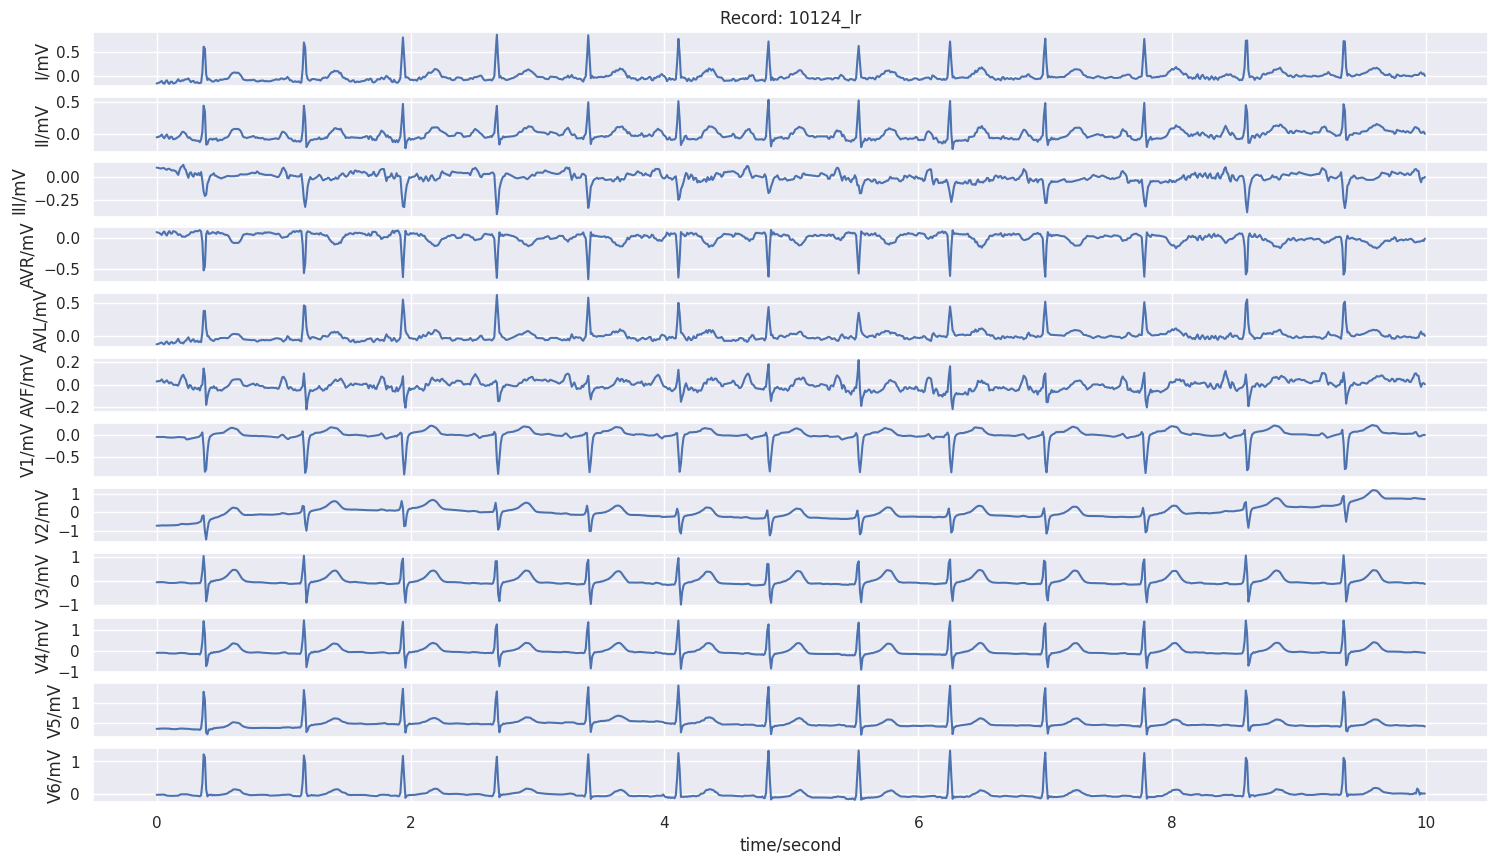

None

In [ ]:
idxs = list(np.random.randint(0, high = X_train.shape[0] + 1, size = (5))) 

for idx in idxs:
  ecg_id = Y_train.index[idx]
  path = data_folder / Y_train.filename_lr.iloc[idx]
  record = wfdb.rdrecord(path)
  display(wfdb.plot_wfdb(record=record, figsize=(18,10)))

In [ ]:
X_train

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [ ]:
display(meta0)
channels = meta0['sig_name']

{'fs': 100,
 'sig_len': 1000,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': []}

In [ ]:
channels

['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [ ]:
# Quantiles of the signal overall, for offsets in the new figures:
np.quantile(X_train, [.001, .005, .01, .5, .99, .995, .999])

array([-1.842, -0.993, -0.688, -0.01 ,  0.756,  1.026,  1.714])

In [ ]:


from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
def structured_interactive_signal_plot(idxs: np.array, X: np.array, Y: pd.DataFrame, sampling_rate: int, channels = np.arange(12, dtype = np.int32)) -> None:
  """
  Takes a 2D numpy array with the ECG signal of one subject,
  and plots these in interactive figures.

  Inputs:
  - idx: 1D np array or list of indices to subset from X
  - X: 3D numpy array of shape (.,., 12)
  - Y: corresponding metadata dataframe
  - sampling_rate: the sampling rate, to determine the X-axis units
  - channels: list of ints, the indices of the channels to be displayed
  """
  channel_names = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

  colors = px.colors.qualitative.Dark24
  print("---------------------------------------------------------------------")
  for s_idx in idxs: # subject_index:
    X_subject = X[s_idx, :, :]
    scp_code = Y.scp_codes.iloc[s_idx]
    ecg_id = Y.index[s_idx]

    fig = make_subplots(rows=len(channels), cols=1, shared_xaxes=True, vertical_spacing=0.02)
    for n_idx, idx in enumerate(channels):
      X_i = X_subject[:, idx]
      max_size = max(1.02 * max(np.max(X_i), - np.min(X_i)), 2.)

      fig.append_trace(go.Scatter(x = np.arange(X_subject.shape[0]) / sampling_rate, y = X_subject[:,idx], name = channel_names[idx], marker_color = colors[idx]), row = n_idx + 1, col = 1)
      fig.update_yaxes(range = [-max_size,max_size], row =n_idx+1, col = 1)
      fig.append_trace(go.Scatter(x = np.arange(X_subject.shape[0]) / sampling_rate, y = np.zeros(X_subject.shape[0]), marker_color = 'black', line = dict(width = 1.),  showlegend = False), row = n_idx + 1, col =1)
      #if idx != 11:
      #  fig.update_yaxes(nticks = 0)
      #fig.add_hline(y=23. - 2. * idx, )
    fig.update_layout(title = f'ECG id: {ecg_id}, scp: {scp_code}')
    fig.show()
    print("---------------------------------------------------------------------")

def structured_interactive_signal_plot2(idxs: np.array, X: np.array, Y: pd.DataFrame, sampling_rate: int, channels = np.arange(12, dtype = np.int32)) -> None:
  """
  Takes a 2D numpy array with the ECG signal of one subject,
  and plots these in interactive figures.

  Inputs:
  - idx: 1D np array or list of indices to subset from X
  - X: 3D numpy array of shape (.,., 12)
  - Y: corresponding metadata dataframe
  - sampling_rate: the sampling rate, to determine the X-axis units
  - channels: list of ints, the indices of the channels to be displayed
  """
  channel_names = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

  colors = px.colors.qualitative.Dark24
  print("---------------------------------------------------------------------")
  for s_idx in idxs: # subject_index:
    X_subject = X[s_idx, :, :]
    scp_code = Y.scp_codes.iloc[s_idx]
    ecg_id = Y.index[s_idx]

    fig = go.Figure()
    for n_idx, idx in enumerate(channels):
      fig.add_trace(go.Scatter(x = np.arange(X_subject.shape[0]) / sampling_rate, y = X_subject[:,idx] + 2. * (len(channels) - n_idx), name = channel_names[idx], marker_color = colors[idx]))
      fig.add_trace(go.Scatter(x = np.arange(X_subject.shape[0]) / sampling_rate, y = np.zeros(X_subject.shape[0]) + 2. * (len(channels) - n_idx), marker_color = 'black', line = dict(width = 1.),  showlegend = False))
    fig.update_layout(title = f'ECG id: {ecg_id}, scp: {scp_code}', yaxis = dict(showticklabels=False))
    fig.show()
    print("---------------------------------------------------------------------")

     


In [ ]:
idxs = list(np.random.randint(0, high = X_train.shape[0] + 1, size = (5))) 
structured_interactive_signal_plot(idxs, X_train, Y_train, sampling_rate, channels = np.arange(12, dtype = np.int32))

---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------


In [ ]:
display(Y_train.iloc[idxs][['scp_codes','baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'r_peaks', 'diagnostic_superclass' ]])

scp_codes baseline_drift  \
ecg_id                                                                     
10316           {'NORM': 100.0, 'LPR': 0.0, 'STACH': 0.0}            NaN   
5935                           {'NORM': 100.0, 'SR': 0.0}           , V5   
21487   {'LVH': 50.0, 'INJAS': 100.0, 'ISCIN': 100.0, ...            NaN   
656     {'NDT': 100.0, 'DIG': 80.0, 'STD_': 0.0, 'AFIB...            NaN   
20514                          {'IMI': 15.0, 'AFIB': 0.0}            NaN   

       static_noise burst_noise electrodes_problems extra_beats pacemaker  \
ecg_id                                                                      
10316           NaN          v5                 NaN         NaN       NaN   
5935            NaN         NaN                 NaN         NaN       NaN   
21487           NaN         NaN                 NaN         NaN       NaN   
656             NaN         NaN                 NaN         NaN       NaN   
20514           NaN         NaN                 NaN         NaN       NaN   

                                                  r_peaks  \
ecg_id                                                      
10316   [ 13  72 131 190 249 309 369 428 487 545 604 6...   
5935                [ 77 181 285 380 477 581 692 800 907]   
21487           [ 67 161 251 342 437 535 630 730 839 942]   
656         [ 41 173 259 347 423 557 650 736 805 875 966]   
20514   [ 19  61 135 179 244 306 379 449 491 538 614 6...   

       diagnostic_superclass  
ecg_id                        
10316                 [NORM]  
5935                  [NORM]  
21487    [CD, STTC, HYP, MI]  
656                   [STTC]  
20514                   [MI]

In [ ]:
# TODO in heatmap
device_stats = Y_train.groupby('device')[['baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats']].apply(lambda x: (~x.isna()).sum() / x.shape[0])
device_stats['num_ecg'] = Y_train.groupby('device').apply(lambda x: x.shape[0])
device_stats   

baseline_drift  static_noise  burst_noise  electrodes_problems  \
device                                                                       
AT-6     6        0.050197      0.019177     0.019741             0.001692   
AT-6 C            0.202055      0.178082     0.013699             0.030822   
AT-6 C 5.0        0.217391      0.043478     0.043478             0.000000   
AT-6 C 5.3        0.040816      0.000000     0.000000             0.020408   
AT-6 C 5.5        0.050629      0.022251     0.013222             0.000322   
AT-6 C 5.6        0.081633      0.020408     0.000000             0.000000   
AT-6 C 5.8        0.054711      0.024316     0.012158             0.000000   
AT-60    3        0.030050      0.213689     0.006678             0.000000   
CS-12             0.096358      0.130501     0.009105             0.001517   
CS-12   E         0.189230      0.255662     0.027680             0.001510   
CS100    3        0.018460      0.237319     0.057209             0.000166   

            extra_beats  num_ecg  
device                            
AT-6     6     0.053582     1773  
AT-6 C         0.082192      292  
AT-6 C 5.0     0.086957       46  
AT-6 C 5.3     0.040816       49  
AT-6 C 5.5     0.053209     3101  
AT-6 C 5.6     0.061224       49  
AT-6 C 5.8     0.051672      658  
AT-60    3     0.100167      599  
CS-12          0.100152     2636  
CS-12   E      0.036236     1987  
CS100    3     0.133045     6013

In [ ]:
for clm in ['static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker']:
  mask = ~Y_train[clm].isna().reset_index(drop=True)
  idxs = mask[mask].index
  idxs = np.random.choice(idxs, size = (2))

  print(f'\n{clm}:')
  display(Y_train.iloc[idxs,:][['scp_codes','baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
      'extra_beats', 'pacemaker', 'r_peaks', 'diagnostic_superclass' ]])
  structured_interactive_signal_plot2(idxs, X_train, Y_train, sampling_rate, channels = np.arange(12, dtype = np.int32))


static_noise:


scp_codes baseline_drift  \
ecg_id                                                                
14929   {'ASMI': 100.0, 'LAFB': 100.0, 'STACH': 0.0}            NaN   
15327      {'IPLMI': 100.0, 'ABQRS': 0.0, 'SR': 0.0}            NaN   

        static_noise burst_noise electrodes_problems extra_beats pacemaker  \
ecg_id                                                                       
14929    , mittel,            v6                 NaN         NaN       NaN   
15327     , I-AVF,           NaN                 NaN         NaN       NaN   

                                                  r_peaks  \
ecg_id                                                      
14929   [ 65 133 201 269 335 406 474 542 610 678 747 8...   
15327   [ 42 114 185 257 330 404 477 550 624 697 772 8...   

       diagnostic_superclass  
ecg_id                        
14929               [CD, MI]  
15327                   [MI]

---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------

burst_noise:


scp_codes baseline_drift  \
ecg_id                                                                     
4146    {'ISC_': 100.0, 'LVH': 100.0, 'STD_': 0.0, 'IN...            NaN   
9488              {'ILMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}            NaN   

        static_noise burst_noise electrodes_problems extra_beats pacemaker  \
ecg_id                                                                       
4146     , leicht,            v5                 NaN         NaN       NaN   
9488             NaN       V3-V6                 NaN         NaN       NaN   

                                          r_peaks diagnostic_superclass  
ecg_id                                                                   
4146    [ 21 133 242 351 454 557 662 769 875 980]           [HYP, STTC]  
9488        [ 96 207 317 429 541 653 765 879 987]                  [MI]

---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------

electrodes_problems:


scp_codes baseline_drift static_noise burst_noise  \
ecg_id                                                                       
2578    {'NORM': 100.0, 'SR': 0.0}     , V1 stark   , I-AVL,           NaN   
2578    {'NORM': 100.0, 'SR': 0.0}     , V1 stark   , I-AVL,           NaN   

       electrodes_problems extra_beats pacemaker  \
ecg_id                                             
2578                    V6         NaN       NaN   
2578                    V6         NaN       NaN   

                                                  r_peaks  \
ecg_id                                                      
2578    [ 13  76 137 199 261 324 389 452 515 578 642 7...   
2578    [ 13  76 137 199 261 324 389 452 515 578 642 7...   

       diagnostic_superclass  
ecg_id                        
2578                  [NORM]  
2578                  [NORM]

---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------

extra_beats:


scp_codes baseline_drift  \
ecg_id                                                                     
9549    {'IVCD': 100.0, 'NDT': 100.0, 'PVC': 100.0, 'A...            NaN   
13423   {'LVH': 100.0, 'ISC_': 100.0, 'PVC': 100.0, 'A...            NaN   

       static_noise burst_noise electrodes_problems extra_beats pacemaker  \
ecg_id                                                                      
9549     , I-AVF,           NaN                 NaN  VES3,alles       NaN   
13423    , alles,           NaN                 NaN  VES3,alles       NaN   

                                                  r_peaks  \
ecg_id                                                      
9549    [ 38  95 143 222 270 330 401 462 506 557 610 6...   
13423       [ 91 132 169 278 395 464 508 577 661 820 938]   

       diagnostic_superclass  
ecg_id                        
9549              [CD, STTC]  
13423            [HYP, STTC]

---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------

pacemaker:


scp_codes baseline_drift static_noise burst_noise  \
ecg_id                                                            
17098   {'PACE': 100.0}            NaN          NaN          V1   
20181   {'PACE': 100.0}            NaN          NaN         NaN   

       electrodes_problems extra_beats      pacemaker  \
ecg_id                                                  
17098                  NaN         NaN  ja, pacemaker   
20181                  NaN         NaN  ja, pacemaker   

                                                  r_peaks  \
ecg_id                                                      
17098   [ 17 103 189 274 360 446 532 618 704 790 876 962]   
20181       [ 37 145 267 340 435 555 622 704 825 895 973]   

       diagnostic_superclass  
ecg_id                        
17098                     []  
20181                     []

---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------


###EDA

In [ ]:
# load and convert annotation data
data_path = '/content/drive/MyDrive/ML_Project_Data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/'
Y = pd.read_csv(data_path + 'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

Y[['scp_codes']]
Y

patient_id    age  sex  height  weight  nurse  site      device  \
ecg_id                                                                    
1          15709.0   56.0    1     NaN    63.0    2.0   0.0   CS-12   E   
2          13243.0   19.0    0     NaN    70.0    2.0   0.0   CS-12   E   
3          20372.0   37.0    1     NaN    69.0    2.0   0.0   CS-12   E   
4          17014.0   24.0    0     NaN    82.0    2.0   0.0   CS-12   E   
5          17448.0   19.0    1     NaN    70.0    2.0   0.0   CS-12   E   
...            ...    ...  ...     ...     ...    ...   ...         ...   
21833      17180.0   67.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21834      20703.0  300.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21835      19311.0   59.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21836       8873.0   64.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21837      11744.0   68.0    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_date  \
ecg_id                        
1       1984-11-09 09:17:34   
2       1984-11-14 12:55:37   
3       1984-11-15 12:49:10   
4       1984-11-15 13:44:57   
5       1984-11-17 10:43:15   
...                     ...   
21833   2001-05-31 09:14:35   
21834   2001-06-05 11:33:39   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ... SLI-LVH  \
ecg_id                                                     ...           
1                  sinusrhythmus periphere niederspannung  ...   False   
2                     sinusbradykardie sonst normales ekg  ...    True   
3                              sinusrhythmus normales ekg  ...   False   
4                              sinusrhythmus normales ekg  ...   False   
5                              sinusrhythmus normales ekg  ...   False   
...                                                   ...  ...     ...   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...   False   
21834   sinusrhythmus lagetyp normal qrs(t) abnorm    ...  ...   False   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...   False   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...   False   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...   False   

       QRS-CLBB ST-ELEV-MI ST-DEPR-MI  Q-ISC  Q-ISC-QPeak  Q-ISC-V2V3  \
ecg_id                                                                  
1         False      False      False  False        False       False   
2         False      False      False  False        False       False   
3         False      False      False  False        False       False   
4         False      False      False  False        False       False   
5         False      False      False  False        False       False   
...         ...        ...        ...    ...          ...         ...   
21833     False      False       True  False        False       False   
21834     False      False      False  False        False       False   
21835     False      False      False  False        False       False   
21836     False      False      False  False        False       False   
21837     False      False      False  False        False       False   

        Q-ISC-RPeak STRAIN MI-ALL  
ecg_id                             
1             False  False  False  
2             False  False  False  
3             False  False  False  
4             False  False  False  
5             False  False  False  
...             ...    ...    ...  
21833         False  False   True  
21834         False  False  False  
21835         False  False  False  
21836         False  False  False  
21837         False  False  False  

[21801 rows x 43 columns]

In [ ]:
# Load raw signal data
if os.path.isfile('/content/drive/MyDrive/PTB-XL/X.pkl') == False:
  X = load_raw_data(Y, sampling_rate, path)
  pickle.dump(X, open('/content/drive/MyDrive/PTB-XL/X.pkl', 'wb'))
else:
  X = pickle.load(open('/content/drive/MyDrive/PTB-XL/X.pkl', 'rb'))

In [ ]:
agg_df = pd.read_csv(data_folder /'scp_statements.csv', index_col=0)

In [ ]:
agg_df = agg_df[agg_df.diagnostic == 1]

In [ ]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))
    
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']

ecg_id
39       [STTC, MI]
45        [CD, HYP]
50         [CD, MI]
77         [CD, MI]
87       [CD, STTC]
            ...    
21815      [CD, MI]
21821    [CD, NORM]
21827    [STTC, MI]
21828    [STTC, MI]
21829    [CD, NORM]
Name: diagnostic_superclass, Length: 5148, dtype: object

In [ ]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+ str(r) for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_NST_, sub_STTC]
28                    [sub_NST_, sub_STTC]
39           [sub_NST_, sub_IMI, sub_STTC]
45       [sub_IRBBB, sub_RVH, sub_RAO/RAE]
50                     [sub_LMI, sub_IVCD]
                       ...                
21821                [sub_IRBBB, sub_NORM]
21827                  [sub_ISCA, sub_IMI]
21828                  [sub_ISCA, sub_IMI]
21829                [sub_IRBBB, sub_NORM]
21832            [sub_LAFB/LPFB, sub_IVCD]
Name: diagnostic_subclass, Length: 6181, dtype: object

In [ ]:
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [ ]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+str(r) for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_NST_, sub_STTC]
28                    [sub_NST_, sub_STTC]
39           [sub_NST_, sub_IMI, sub_STTC]
45       [sub_IRBBB, sub_RVH, sub_RAO/RAE]
50                     [sub_LMI, sub_IVCD]
                       ...                
21821                [sub_IRBBB, sub_NORM]
21827                  [sub_ISCA, sub_IMI]
21828                  [sub_ISCA, sub_IMI]
21829                [sub_IRBBB, sub_NORM]
21832            [sub_LAFB/LPFB, sub_IVCD]
Name: diagnostic_subclass, Length: 6181, dtype: object

In [ ]:
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [ ]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1
            
        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]
    
    for sc in update_cols:
        y_selected[sc] = 0
        
    cls_updt = ClassUpdate(update_cols)
    
    y_selected = y_selected.apply(cls_updt, axis=1)
    
    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

In [ ]:
x_all, y_all = get_data_by_folds(np.arange(1, 11), X, Y, update_cols, meta_cols)

In [ ]:
y_all

age  sex  height  weight  nurse  site      device  NORM  MI  STTC  \
ecg_id                                                                        
1        56.0    1     NaN    63.0    2.0   0.0   CS-12   E     1   0     0   
2        19.0    0     NaN    70.0    2.0   0.0   CS-12   E     1   0     0   
3        37.0    1     NaN    69.0    2.0   0.0   CS-12   E     1   0     0   
4        24.0    0     NaN    82.0    2.0   0.0   CS-12   E     1   0     0   
5        19.0    1     NaN    70.0    2.0   0.0   CS-12   E     1   0     0   
...       ...  ...     ...     ...    ...   ...         ...   ...  ..   ...   
21833    67.0    1     NaN     NaN    1.0   2.0  AT-60    3     0   0     1   
21834   300.0    0     NaN     NaN    1.0   2.0  AT-60    3     1   0     0   
21835    59.0    1     NaN     NaN    1.0   2.0  AT-60    3     0   0     1   
21836    64.0    1     NaN     NaN    1.0   2.0  AT-60    3     1   0     0   
21837    68.0    0     NaN     NaN    1.0   2.0  AT-60    3     1   0     0   

        ...  sub_SEHYP  sub_ISCI  sub_ISC_  sub_CRBBB  sub_CLBBB  sub_LAO/LAE  \
ecg_id  ...                                                                     
1       ...          0         0         0          0          0            0   
2       ...          0         0         0          0          0            0   
3       ...          0         0         0          0          0            0   
4       ...          0         0         0          0          0            0   
5       ...          0         0         0          0          0            0   
...     ...        ...       ...       ...        ...        ...          ...   
21833   ...          0         0         0          0          0            0   
21834   ...          0         0         0          0          0            0   
21835   ...          0         0         0          0          0            0   
21836   ...          0         0         0          0          0            0   
21837   ...          0         0         0          0          0            0   

        sub_ILBBB  sub_PMI  sub_WPW  strat_fold  
ecg_id                                           
1               0        0        0           3  
2               0        0        0           2  
3               0        0        0           5  
4               0        0        0           3  
5               0        0        0           4  
...           ...      ...      ...         ...  
21833           0        0        0           7  
21834           0        0        0           4  
21835           0        0        0           2  
21836           0        0        0           8  
21837           0        0        0           9  

[21801 rows x 36 columns]

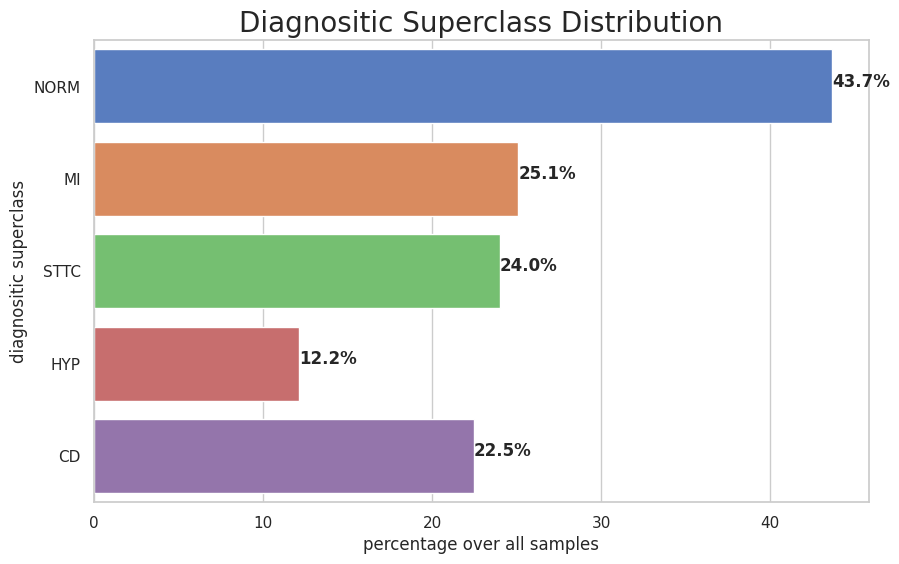

In [ ]:
vc = y_all[superclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=(vc.values/y_all.shape[0])*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Superclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic superclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

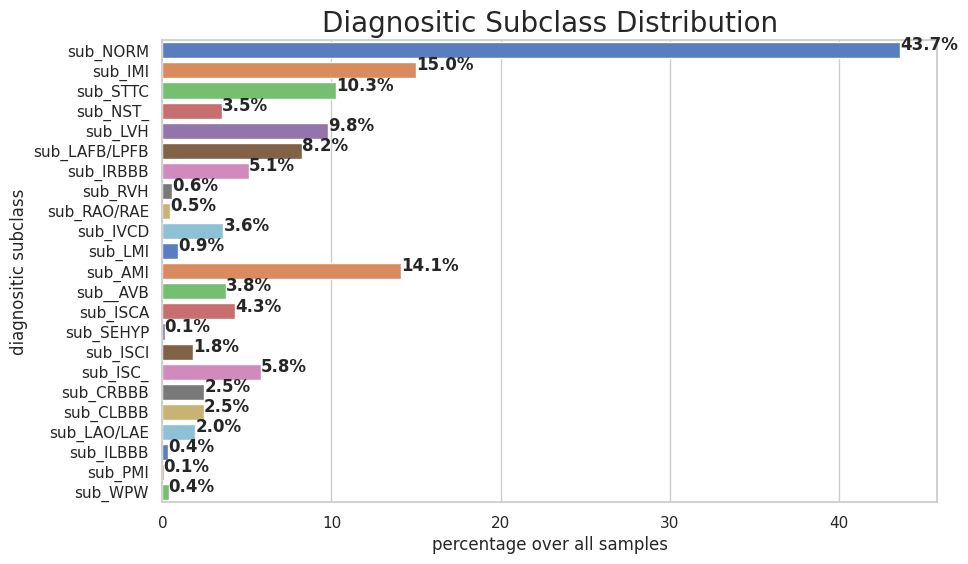

In [ ]:
vc = y_all[subclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=(vc.values/y_all.shape[0])*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Subclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic subclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

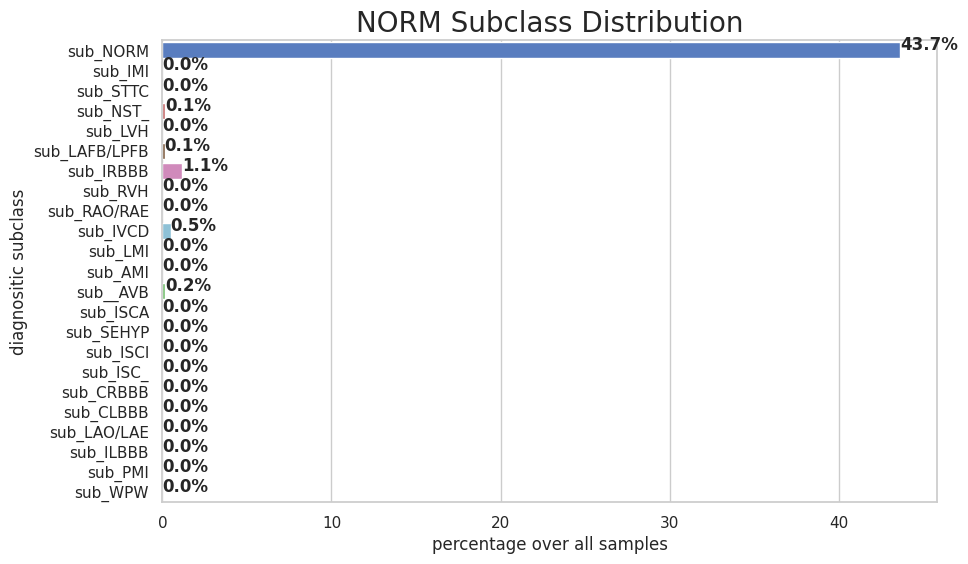

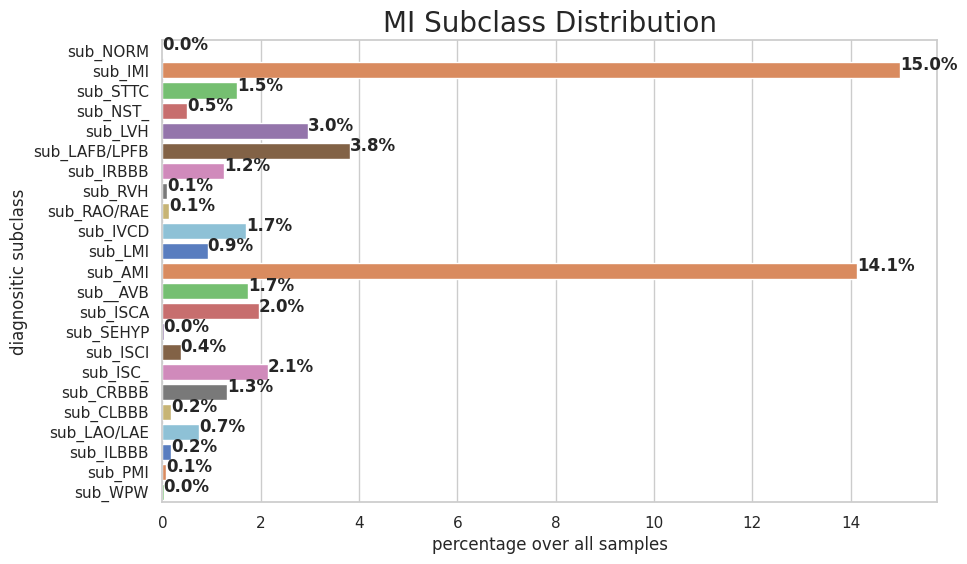

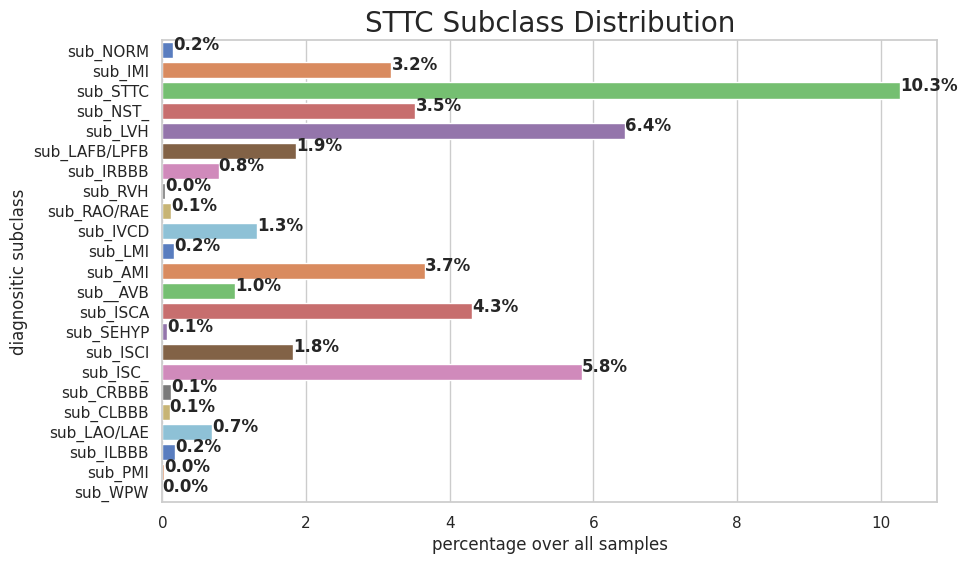

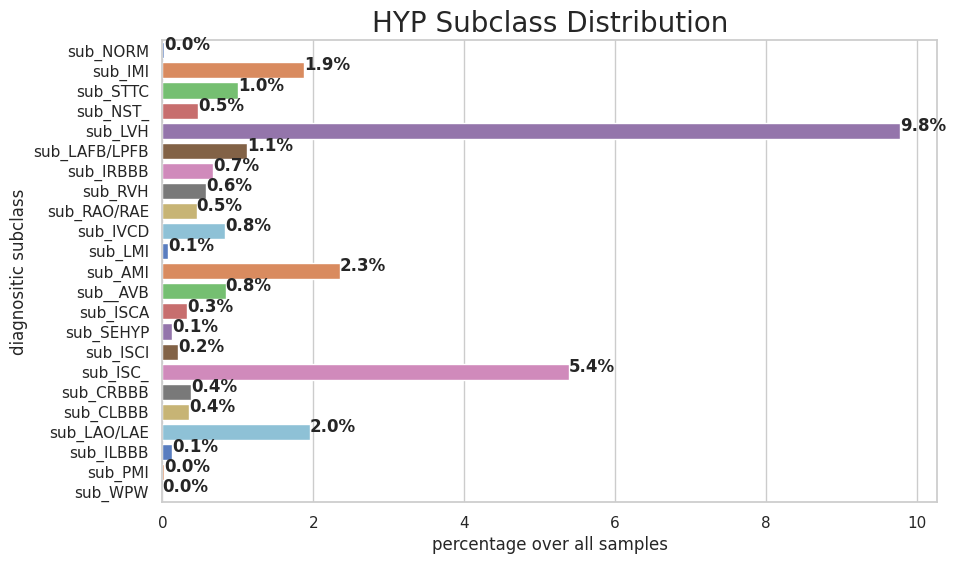

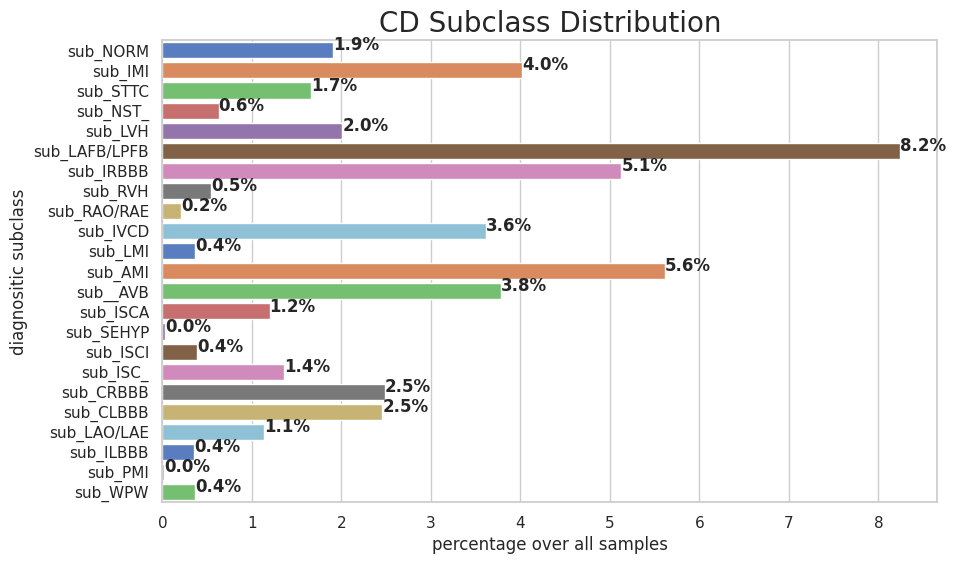

In [ ]:
for superclass in superclass_cols:
    
    vc = y_all.loc[y_all[superclass] == 1][subclass_cols].sum(axis=0)
    
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
    ax.set_title("{} Subclass Distribution".format(superclass), fontsize=20)
    ax.set_xlabel ("percentage over all samples")
    ax.set_ylabel ("diagnositic subclass")
    for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

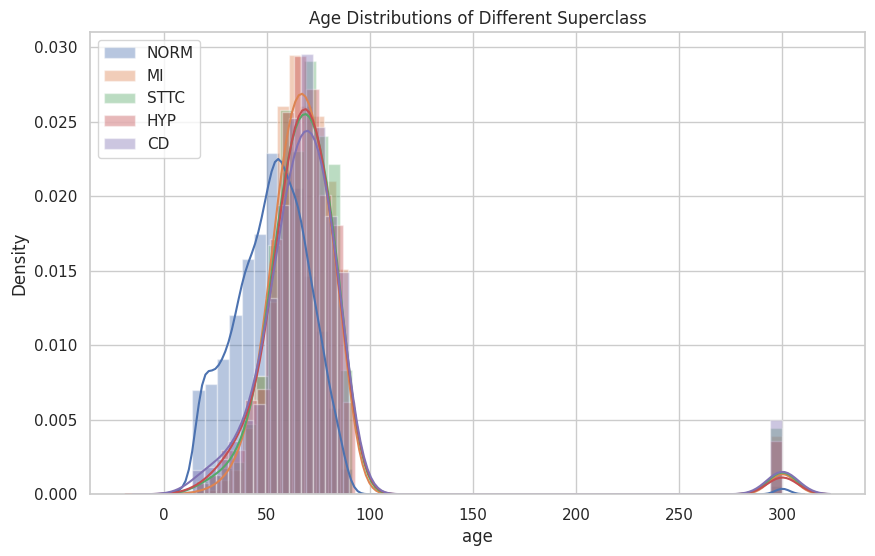

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Age Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1]['age']   
    sns.distplot(data, label=superclass)


plt.legend(loc='upper left')
plt.show()

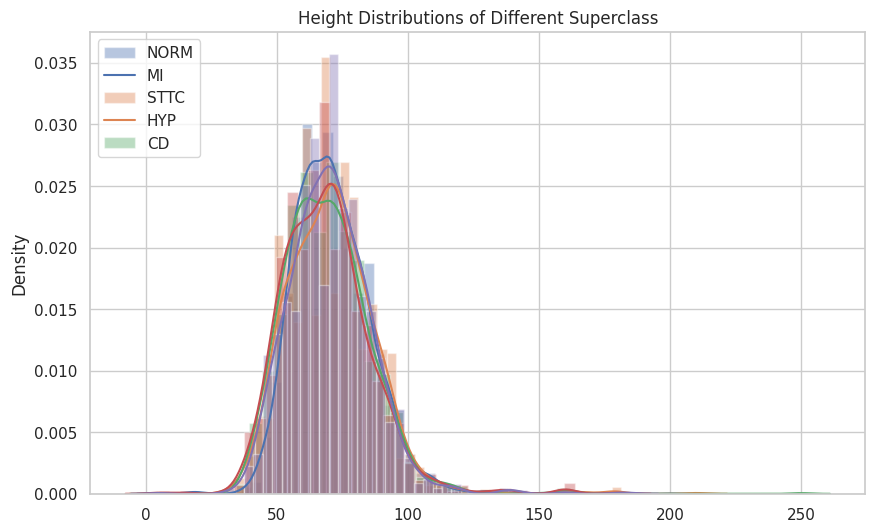

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Height Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['weight']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

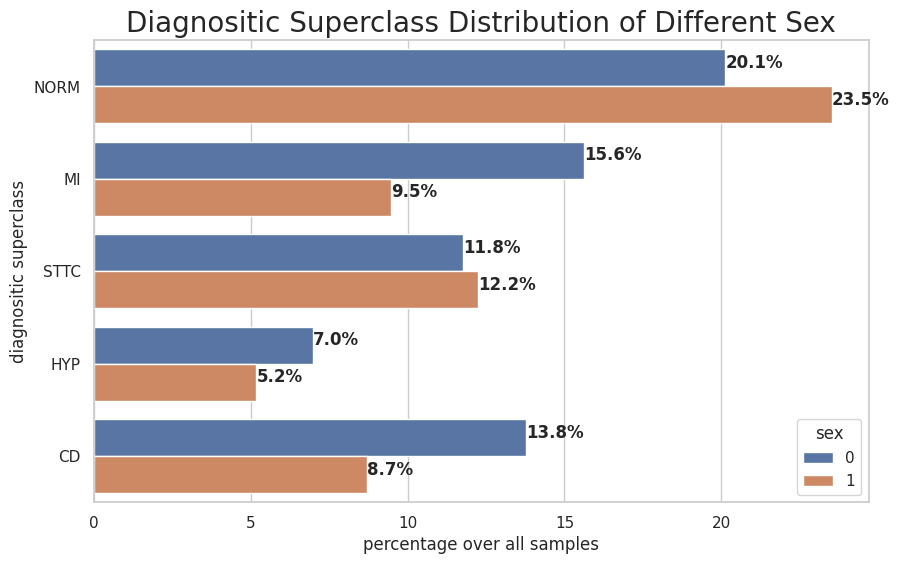

In [ ]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
    
ax.set_title("Diagnositic Superclass Distribution of Different Sex", fontsize=20)

all_index, all_count, all_values = [], [], []
for sex in y_all.sex.unique():
    vc = y_all.loc[y_all.sex == sex][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [sex]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['sex'] = all_values
    
ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="sex",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')